This notebook contains plots of various statistical and systems metrics gathered from the last run

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import imp

import visualization_utils

In [40]:
# Change this to the experiment you want to view
experiment_name = 'cnn_baseline'

SHOW_WEIGHTED = True # show weighted accuracy instead of unweighted accuracy
PLOT_CLIENTS = False

stat_file = '{}_stat.csv'.format(experiment_name) # change to None if desired
sys_file = '{}_sys.csv'.format(experiment_name) # change to None if desired

stat_metrics, sys_metrics = visualization_utils.load_data(stat_file, sys_file)

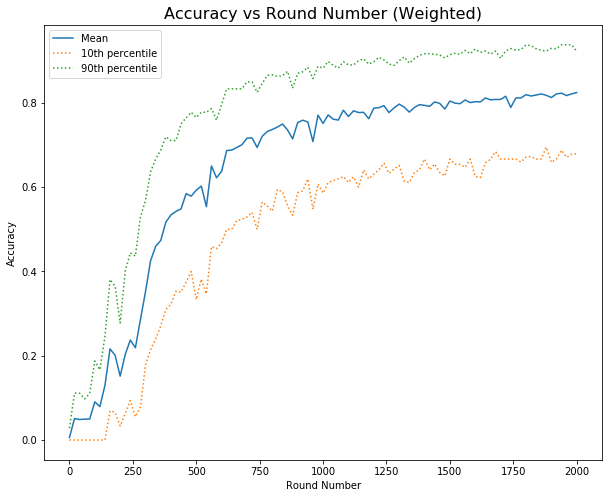

In [36]:
# Plots accuracy vs. round number.
if stat_metrics is not None:
    visualization_utils.plot_accuracy_vs_round_number(stat_metrics, True, plot_stds=False)

In [4]:
PLOT_CLIENTS=False
if PLOT_CLIENTS and stat_metrics is not None:
    visualization_utils.plot_accuracy_vs_round_number_per_client(stat_metrics, sys_metrics, max_num_clients=20)

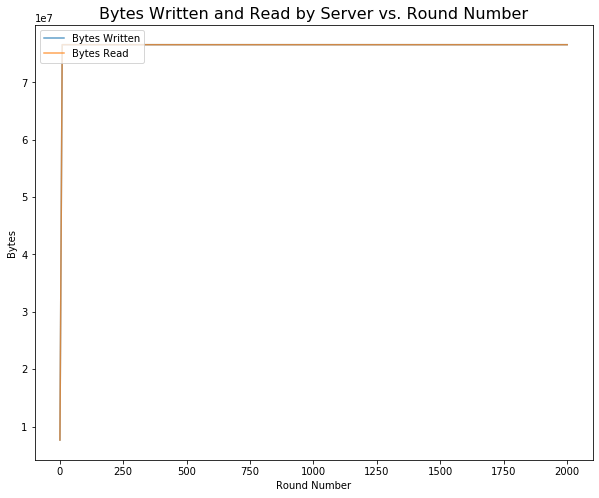

In [37]:
# Plots the cumulative sum of the bytes written and read by the server in 
# the past rolling_window rounds versus the round number

if stat_metrics is not None:
    visualization_utils.plot_bytes_written_and_read(sys_metrics, rolling_window=10)

In [6]:
visualization_utils.plot_client_computations_vs_round_number(sys_metrics, aggregate_window=1, max_num_clients=20, range_rounds=(1, 4))

KeyboardInterrupt: 

In [7]:
print('Longest FLOPs path: %s' % visualization_utils.get_longest_flops_path(sys_metrics))

KeyboardInterrupt: 

In [41]:
pd.to_numeric(sys_metrics[['bytes_read']].sum(), downcast='float')

bytes_read    5.282968e+11
dtype: float32

In [1]:
stat_metrics

NameError: name 'stat_metrics' is not defined